In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine, func, inspect

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)
print(inspector.get_table_names())

['measurement', 'station']


In [4]:
columns = inspector.get_columns("measurement")
for col in columns:
    print(col["name"], col["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [5]:
query = """
        SELECT
            *
        FROM
            station
        LIMIT 100
        """

In [6]:
conn = engine.connect()
df = pd.read_sql(query, con=conn)
conn.close()

In [7]:
df.tail()

,id,station,name,latitude,longitude,elevation
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [8]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
lastYear = """
        Select
            date,
            prcp
        FROM
            measurement
        WHERE
-- Calculate the date 1 year ago from the last data point in the database
            date >= (
                SELECT
                    date(MAX(date), '-365 day')
                FROM
                    measurement
                    )
        ORDER BY
            date
        """

In [9]:
lastYear

"\n        Select\n            date,\n            prcp\n        FROM\n            measurement\n        WHERE\n-- Calculate the date 1 year ago from the last data point in the database\n            date >= (\n                SELECT\n                    date(MAX(date), '-365 day')\n                FROM\n                    measurement\n                    )\n        ORDER BY\n            date\n        "

In [10]:


# Perform a query to retrieve the data and precipitation scores

conn = engine.connect()
prcp_df = pd.read_sql(lastYear, con=conn)
conn.close()

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


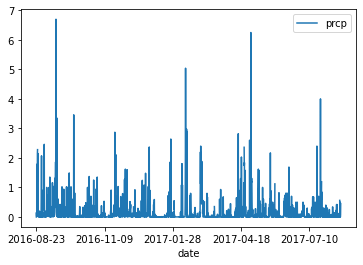

In [12]:
# Sort the dataframe by date
prcp_df.set_index("date").plot()

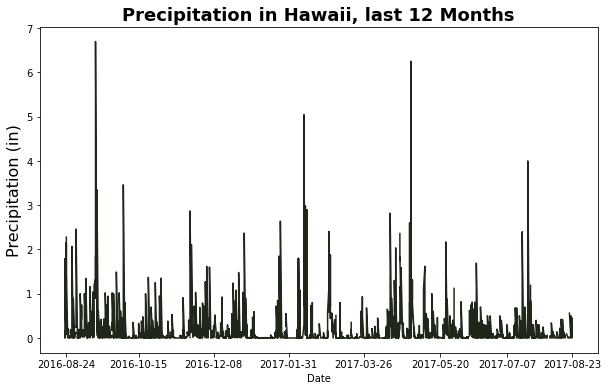

In [35]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,6))
plt.plot(prcp_df.date, prcp_df.prcp, color = "#1F271B")
plt.title("Precipitation in Hawaii, last 12 Months", fontweight="bold", fontsize=18)
plt.ylabel("Precipitation (in)", fontsize=16)
plt.xlabel("Date")

xticks = [1, 53, 107, 161, 215, 270, 318, 365]
plt.xticks(xticks)

plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# Design a query to show how many stations are available in this dataset?
query2 = """
        SELECT
            count(*) as station_count
        FROM
            station
        """

In [16]:
conn = engine.connect()
station_df = pd.read_sql(query2, con=conn)
conn.close()

In [17]:
station_df.head()

,station_count
0,9


In [18]:
query3 = """
        SELECT
        s.station,
        count(*) as total_obsrv
        FROM
            station s
        JOIN measurement m on s.station = m.station
        GROUP BY s.station
-- # List the stations and the counts in descending order.
        ORDER BY
            count(*) desc
        """

In [19]:
conn = engine.connect()
observations_df = pd.read_sql(query3, con=conn)
conn.close()

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
observations_df

,station,total_obsrv
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query4 = """
        SELECT
            m.date,
            m.prcp,
            m.tobs,
            s.station,
            s.name
        FROM
            measurement m
            JOIN station s on s.station = m.station
        WHERE
            date >= (
                SELECT
                    date(MAX(date), '-365 day')
                FROM
                    measurement
                    )
        ORDER BY
            date
        """

In [22]:
conn = engine.connect()
active_df = pd.read_sql(query4, con=conn)
conn.close()

In [23]:
active_df

,date,prcp,tobs,station,name
0,2016-08-23,0.00,81.0,USC00519397,"WAIKIKI 717.2, HI US"
1,2016-08-23,0.15,76.0,USC00513117,"KANEOHE 838.1, HI US"
2,2016-08-23,0.05,80.0,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
3,2016-08-23,NaN,80.0,USC00517948,"PEARL CITY, HI US"
4,2016-08-23,0.02,80.0,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US"
...,...,...,...,...,...
2225,2017-08-22,0.50,76.0,USC00516128,"MANOA LYON ARBO 785.2, HI US"
2226,2017-08-23,0.00,81.0,USC00519397,"WAIKIKI 717.2, HI US"
2227,2017-08-23,0.00,82.0,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
2228,2017-08-23,0.08,82.0,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US"


In [24]:
# Filter for most active
mostActive_df = active_df.loc[active_df["station"] == "USC00519281"]
mostActive_df.head()

,date,prcp,tobs,station,name
5,2016-08-23,1.79,77.0,USC00519281,"WAIHEE 837.5, HI US"
12,2016-08-24,2.15,77.0,USC00519281,"WAIHEE 837.5, HI US"
19,2016-08-25,0.06,80.0,USC00519281,"WAIHEE 837.5, HI US"
26,2016-08-26,0.01,80.0,USC00519281,"WAIHEE 837.5, HI US"
31,2016-08-27,0.12,75.0,USC00519281,"WAIHEE 837.5, HI US"


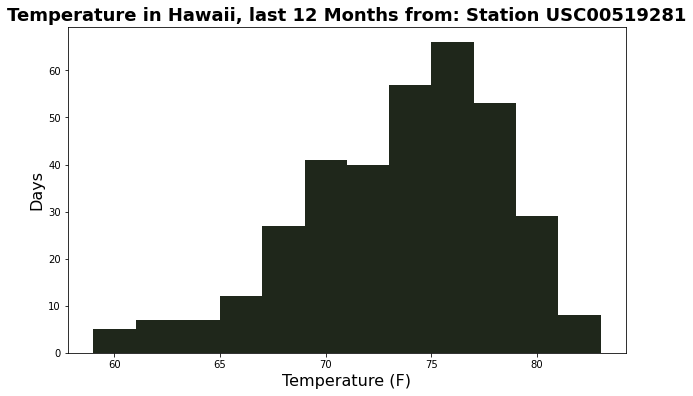

In [29]:
plt.figure(figsize=(10,6))
plt.hist(mostActive_df.tobs, bins=12, color = "#1F271B")
plt.title("Temperature in Hawaii, last 12 Months from: Station USC00519281", fontweight="bold", fontsize=18)
plt.ylabel("Days", fontsize=16)
plt.xlabel("Temperature (F)", fontsize=16)

plt.show()

In [30]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

mostActive_df.describe()

,prcp,tobs
count,352.000000,352.000000
mean,0.198949,73.107955
std,0.419182,4.733315
min,0.000000,59.000000
25%,0.000000,70.000000
50%,0.060000,74.000000
75%,0.190000,77.000000
max,2.980000,83.000000
